In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 100,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9135802469135802, Loss: 0.36846351623535156
Checkpoint 200, Accuracy: 0.9320987654320988, Loss: 0.34569976947925707
Checkpoint 300, Accuracy: 0.9506172839506173, Loss: 0.32128076200132016
Checkpoint 400, Accuracy: 0.9506172839506173, Loss: 0.2986489048710576
Checkpoint 500, Accuracy: 0.9629629629629629, Loss: 0.2762229884112323


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 1. 0.] <-> [0.8274581  0.14708339 0.02545855]
[0. 1. 0.] <-> [0.15872948 0.8147632  0.02650728]
[1. 0. 0.] <-> [0.8671845  0.03997229 0.0928432 ]
[0. 0. 1.] <-> [0.28223714 0.1660553  0.5517075 ]
[1. 0. 0.] <-> [0.95307386 0.02487845 0.02204776]
[1. 0. 0.] <-> [0.9387305  0.02988798 0.03138149]
[1. 0. 0.] <-> [0.850544   0.04456457 0.10489147]
[1. 0. 0.] <-> [0.92289954 0.04034384 0.03675655]
[0. 1. 0.] <-> [0.01112225 0.96779466 0.02108309]
[1. 0. 0.] <-> [0.8642304  0.04276073 0.09300891]
[1. 0. 0.] <-> [0.9375476  0.03367877 0.02877361]
[1. 0. 0.] <-> [0.94901735 0.02044902 0.03053367]
[1. 0. 0.] <-> [0.4870432  0.07306015 0.43989673]
[0. 1. 0.] <-> [0.03697317 0.9332722  0.02975461]
[1. 0. 0.] <-> [0.9517443  0.02306152 0.02519405]
[1. 0. 0.] <-> [0.9380776  0.0225934  0.03932893]
[1. 0. 0.] <-> [0.6843044  0.06002811 0.25566745]
[1. 0. 0.] <-> [0.94053644 0.03093858 0.02852495]
[1. 0. 0.] <-> [0.901276   0.03560545 0.06311857]
[1. 0. 0.] <-> [0.93213665 0.02409703 0.0437663 ]


In [12]:
# Testing Performance

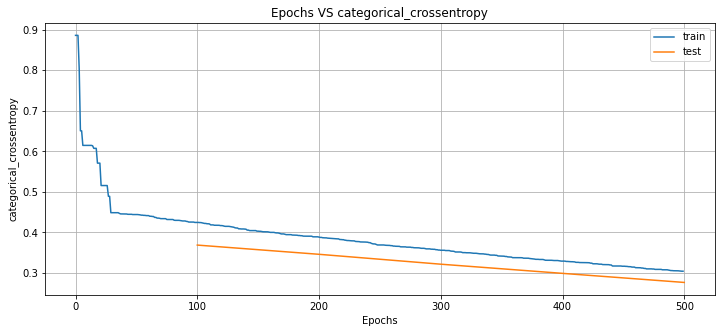

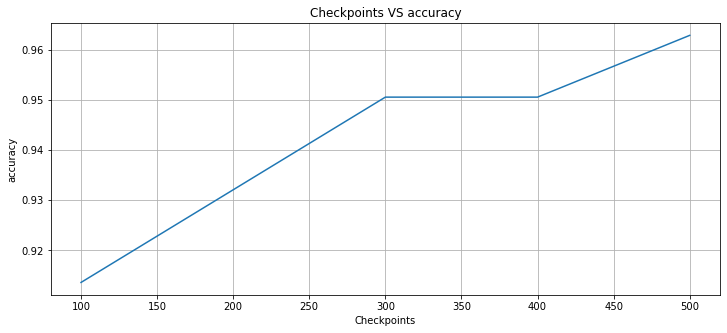

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9135802469135802, 'mean_square_error': 0.18553523659841875, 'categorical_crossentropy': 0.36846351623535156, 'precision': 0.8703703703703703, 'recall': 0.8703703703703703, 'f1': 0.8703703703703703, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 14, 'tn_hit': 14, 'fn_hit': 0}, 1: {'tp_hit': 11, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 4}, 2: {'tp_hit': 3, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 10}}, 'checkpoint': 100} 


{'accuracy': 0.9320987654320988, 'mean_square_error': 0.17320235055858907, 'categorical_crossentropy': 0.34569976947925707, 'precision': 0.8981481481481481, 'recall': 0.8981481481481481, 'f1': 0.8981481481481481, 'essential_metrics': {0: {'tp_hit': 80, 'fp_hit': 11, 'tn_hit': 17, 'fn_hit': 0}, 1: {'tp_hit': 12, 'fp_hit': 0, 'tn_hit': 93, 'fn_hit': 3}, 2: {'tp_hit': 5, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 8}}, 'checkpoint': 200} 


{'accuracy': 0.9506172839506173, 'mean_square_error': 0.15585196776189905, 'categorical_crossentropy': 0.32128076200132016, 'prec

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-2.5659523   0.7840932  -1.4906898  -0.98173463 -1.1693633 ]
 bias: 1.1299139261245728

Neuron 1: weights:
[-1.2168107  2.5544512  2.2137105  2.918085  -2.259062 ]
 bias: -1.9677271842956543

Neuron 2: weights:
[-2.4484      1.1336465   1.9378558  -0.49098206  2.1655302 ]
 bias: -1.590727686882019

Neuron 3: weights:
[-0.2239843   0.84564364 -0.73112756 -1.7214763   1.1395125 ]
 bias: -0.15936417877674103

$
Layer 2
Neuron 0: weights:
[ 3.        -1.8186196 -2.620029   2.524739 ]
 bias: 1.150397777557373

Neuron 1: weights:
[1.832648  1.6680554 2.3938308 1.2878271]
 bias: -1.151703119277954

Neuron 2: weights:
[-0.67098325 -1.445033    1.555067    0.6257341 ]
 bias: 1.722947597503662

$

